# Phase Diagram
In this example, we will generate a 1D and 2D phase diagram for a CO/Pt(111) system.

## Topics Covered
- Create ``StatMech`` objects 
- Initialize ``Reaction`` objects to describe the formation reaction of CO/Pt(111) species
- Generate a 1D phase diagram by varying T
- Generate a 2D phase diagram by varying T and P
- Save the ``PhaseDiagram`` object as a ``JSON`` file

## Create Species for Phase Diagram
We will be considering six CO/Pt(111) configurations. The configurations have CO adsorbed in different sites and different coverages.

<img src="images/configurations.png" width=600>

First, we initialize the species as a dictionary to enable easy `Reaction` initialization.

In [1]:
from ase.build import molecule

from pmutt.statmech import StatMech, presets

species = {
    'CO': StatMech(name='CO', atoms=molecule('CO'),
                   potentialenergy=-14.8021,
                   vib_wavenumbers=[2121.2], symmetrynumber=1, 
                   **presets['idealgas']),
    'Pt': StatMech(name='Pt', potentialenergy=-383.161235,
                   **presets['electronic']),
    'CO(S) 1/16ML fcc': StatMech(
            name='CO(S) 1/16ML fcc', potentialenergy=-399.48282843,
            vib_wavenumbers=[1731.942697, 349.970617, 322.15111,
                             319.114152, 161.45669],
            **presets['harmonic']),
    'CO(S) 1/16ML br': StatMech(
            name='CO(S) 1/16ML br', potentialenergy=-399.464095,
            vib_wavenumbers=[1831.626557, 394.436054, 388.098645,
                             373.063005, 203.887416, 52.987012],
            **presets['harmonic']),
    'CO(S) 1/16ML top': StatMech(
            name='CO(S) 1/16ML top', potentialenergy=-399.39545350,
            vib_wavenumbers=[2045.797559, 489.514815, 396.498284,
                             393.395406, 56.058884, 52.157548],
            **presets['harmonic']),
    'CO(S) 1/8ML': StatMech(
            name='CO(S) 1/8ML', potentialenergy=-415.67626828,
            vib_wavenumbers=[2047.452988, 1730.209946, 482.24755,
                             394.675312, 392.79586, 354.078848,
                             323.143303, 320.375056, 162.356233,
                             158.239412, 60.269377, 51.362263],
            **presets['harmonic']),
    'CO(S) 3/16ML': StatMech(
            name='CO(S) 3/16ML', potentialenergy=-431.867618,
            vib_wavenumbers=[2049.767728, 1746.427506, 1733.474666,
                             478.755939, 391.899407, 389.661616,
                             354.568306, 352.532192, 325.154407,
                             322.578758, 319.593333, 315.883097,
                             163.2316, 162.672434, 158.815096,
                             157.87804, 59.576319, 50.284495],
            **presets['harmonic']),
    'CO(S) 1/2ML': StatMech(
            name='CO(S) 1/2ML', potentialenergy=-512.817507,
            vib_wavenumbers=[2072.099888, 2053.332551, 2052.632444,
                             2052.501762, 1835.620624, 1824.088854,
                             1823.712945, 1823.531493, 481.148383,
                             480.426246, 480.187182, 479.70589, 
                             414.42128, 411.357815, 411.091615,
                             406.851876, 404.128284, 403.391877, 
                             402.879585, 401.452804, 401.134231,
                             397.539281, 394.569066, 394.101234,
                             393.933956, 390.740547, 390.173637,
                             389.805187, 388.420025, 387.427067,
                             383.620218, 383.348263, 201.654999,
                             200.123762, 196.698042, 195.736534, 
                             75.269065, 72.94012, 70.402739,
                             68.651958, 65.289743, 64.556735,
                             63.904694, 60.051442, 58.698334,
                             55.589005, 52.608038, 43.883525],
            **presets['harmonic']),
}

## Create Reactions for Phase Diagram
The reactions will be initialized and put in a list. Notice that the stoichiometric coefficient of CO changes for higher coverages. If you are unfamiliar with initializing reactions, see the Reactions example.

In [2]:
from pmutt.reaction import Reaction

reactions=[
    Reaction.from_string('Pt = Pt', species), # Clean surface
    Reaction.from_string('Pt + CO = CO(S) 1/16ML fcc', species),
    Reaction.from_string('Pt + CO = CO(S) 1/16ML br', species),
    Reaction.from_string('Pt + CO = CO(S) 1/16ML top', species),
    Reaction.from_string('Pt + 2CO = CO(S) 1/8ML', species),
    Reaction.from_string('Pt + 3CO = CO(S) 3/16ML', species),
    Reaction.from_string('Pt + 8CO = CO(S) 1/2ML', species)]

## Create PhaseDiagram Object
Now we have everything we need to create the ``PhaseDiagram`` object.

In [3]:
from pmutt.reaction.phasediagram import PhaseDiagram

phase_diagram = PhaseDiagram(reactions=reactions)

## Creating a 1D Phase Diagram

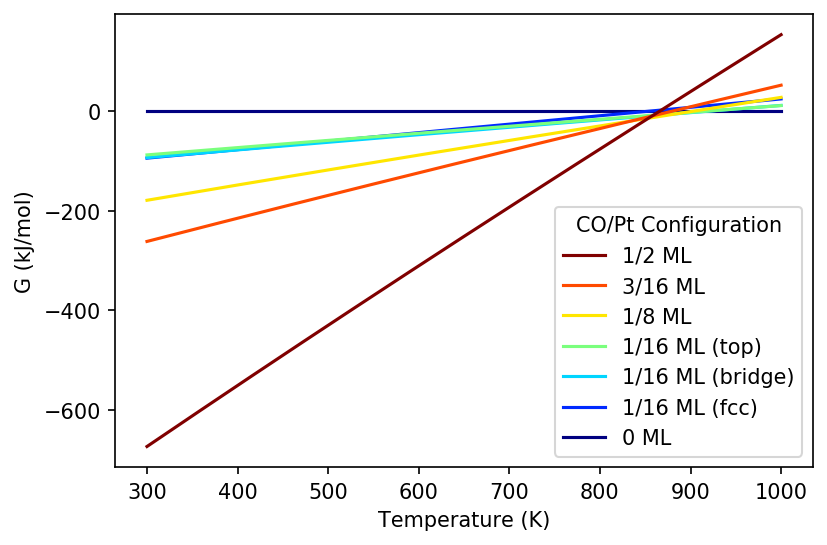

In [4]:
import numpy as np
from matplotlib import pyplot as plt

T = np.linspace(300, 1000, 200) # K
fig1, ax1 = phase_diagram.plot_1D(x_name='T', x_values=T, P=1., G_units='kJ/mol')

'''Plotting adjustments'''
# Set colors to lines
colors = ('#000080', '#0029FF', '#00D5FF', '#7AFF7D', 
          '#FFE600', '#FF4A00', '#800000')
for color, line in zip(colors, ax1.get_lines()):
    line.set_color(color)

# Set labels to lines
labels = ('0 ML', '1/16 ML (fcc)', '1/16 ML (bridge)', 
          '1/16 ML (top)', '1/8 ML', '3/16 ML', '1/2 ML')
handles, _ = ax1.get_legend_handles_labels()
ax1.get_legend().remove()
ax1.legend(handles[::-1], labels[::-1], loc=0,
           title='CO/Pt Configuration')
ax1.set_xlabel('Temperature (K)')

fig1.set_dpi(150.)

## Creating a 2D Phase Diagram

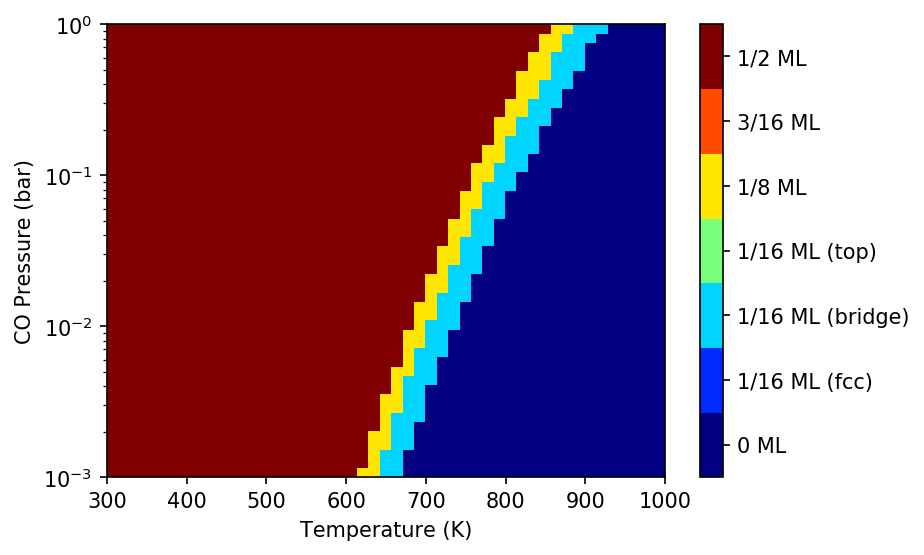

In [5]:
# Generate Pressure range
T = np.linspace(300, 1000) # K
P = np.logspace(-3, 0) # bar

fig2, ax2, c2, cbar2 = phase_diagram.plot_2D(x1_name='T', x1_values=T, 
                                             x2_name='P', x2_values=P)

'''Plotting adjustments'''
# Change y axis to use log scale
ax2.set_yscale('log')
# Add axis labels
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('CO Pressure (bar)')
# Change color scheme
plt.set_cmap('jet')
# Add labels
cbar2.ax.set_yticklabels(labels)

fig2.set_dpi(150.)
plt.show()